# KNN
  - K-Nearest Neighbor의 약자로 자신과 인접한 K개의 데이터로 예측하는 모델
---------------------------------------------------------------------------- 
  - weights : { 'uniform', 'distance'} (기본값 = uniform)
      - uniform: 모든 포인트에 동일한 가중치를 주어 계산한다.
      - distance : 거리에 역으로 가중치를 주어 계산한다.
      ------------------------------------------------
  - n_neighbors : 참고할 데이터 수  (기본값 = 5)
  --------------------------------------------------
  - algorithm : { 'auto', 'ball_tree', 'kd_tree', 'brute'} (기본값 = 'auto')
      - auto 
      - kd_tree : 무차별 대입의 문제점을 보완 ex) A,B가 먼거리에 있는데 B와 C가 가까이 있다면 A와 C는 멀다고 판단. 
      - ball_tree : kd_tree도 비효율적인 측면이 있으므로 더 높은 차원에서 이 부분을 보완.
      - brute : 무차별 대입 즉 계산할 포인트를 무차별로 선정한다. 데이터의 수가 적을 때 효율적
  - leaf_size : 위에 algorithm을 트리로 설정하였을때 트리의 잎에 개수 (기본값 = 30)(나중에 트리모델을 할때 자세히 설명)
  - metric : 거리 측정법 (기본값 = 'minkowski')
  - p : minkowski에 대한 검정력 매개변수 p = 1일때는 manhattan_distance , p=2 일때는 euclidean_distance 로 계산 (기본값 = 2)
      - manhattan_distance: ㅣx - yㅣ
      - euclidean_distance: 우리가 알고있는 점과 점사이에 거리 계산법
      - mahalanobis_distance: 변수 내 분산, 공분산을 모두 반영하여 거리 계산 루트((X-Y)^T(공분산)(X-Y))
      - correlation_distance: 1- c(상관계수) 즉 0~2 사이에 값이 나옴 , 데이터 간 person correlation을 거리측도로 사용하여 데이터 패턴의 유사도를 반영(전반적인 패턴이 중요한 데이터에서 주로 사용)
      - spearman_rank_correlation_distance : 순위형 데이터에서 사용


## Data
  - train_data : 핸드폰 사용자에 error_type
  - target : 불만 접수 유무

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
err_data_target = pd.read_csv('./err_model_nm_target.csv')

In [3]:
err_data_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     7255 non-null   int64  
 1   model_nm    7255 non-null   object 
 2   errtype_1   7255 non-null   float64
 3   errtype_2   7255 non-null   float64
 4   errtype_3   7255 non-null   float64
 5   errtype_4   7255 non-null   float64
 6   errtype_5   7255 non-null   float64
 7   errtype_6   7255 non-null   float64
 8   errtype_7   7255 non-null   float64
 9   errtype_8   7255 non-null   float64
 10  errtype_9   7255 non-null   float64
 11  errtype_10  7255 non-null   float64
 12  errtype_11  7255 non-null   float64
 13  errtype_12  7255 non-null   float64
 14  errtype_13  7255 non-null   float64
 15  errtype_14  7255 non-null   float64
 16  errtype_15  7255 non-null   float64
 17  errtype_16  7255 non-null   float64
 18  errtype_17  7255 non-null   float64
 19  errtype_18  7255 non-null  

In [4]:
train_data = err_data_target.drop(['user_id','model_nm','target'],axis =1)
target_data = err_data_target['target']

In [5]:
train_data

,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42
0,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,0.0,...,10.0,18.0,0.0,1.0,1.0,0.0,0.0,113.0,56.0,1.0
1,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,8.0,0.0,0.0,1.0,1.0,2.0,0.0,17.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,16.0,1.0,0.0,0.0,0.0,0.0,0.0,102.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,0.0,0.0,0.0,29.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7251,0.0,0.0,4.0,95.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,12.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0


## 기본값에서 weights의 변화

In [6]:
from sklearn.model_selection import train_test_split
X , test_x , y, test_y = train_test_split(train_data,target_data, random_state = 10)

In [7]:
print(X.shape, test_x.shape)

(5441, 41) (1814, 41)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

In [9]:
kn.fit(X,y)
kn.score(X,y)

1.0

In [10]:
kn.score(test_x,test_y)

0.7072767364939361

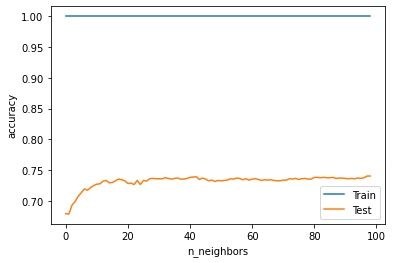

In [11]:
train_score = []
test_score = []
for _ in range(1,100):
    kn = KNeighborsClassifier(n_neighbors=_,weights ='distance')
    kn.fit(X,y)
    train_score.append(kn.score(X,y))
    test_score.append(kn.score(test_x,test_y))
    
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

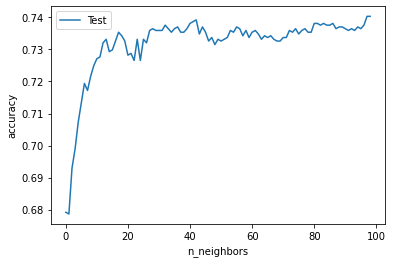

In [12]:
plt.plot(test_score)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(['Test'])
plt.show()

In [13]:
max(test_score)

0.7403528114663727

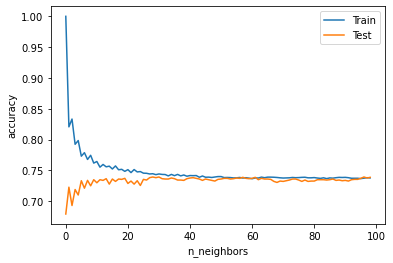

In [94]:
train_score = []
test_score = []
for _ in range(1,100):
    kn = KNeighborsClassifier(n_neighbors=_)
    kn.fit(X,y)
    train_score.append(kn.score(X,y))
    test_score.append(kn.score(test_x,test_y))
    
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

In [97]:
max(test_score)

0.7392502756339581

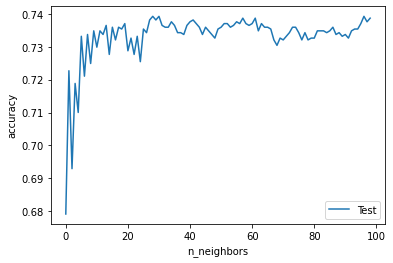

In [98]:
plt.plot(test_score)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(['Test'])
plt.show()

## mahalanobis_distance

In [100]:
kn = KNeighborsClassifier(n_neighbors=5, weights = 'distance',metric='mahalanobis')
kn.fit(X,y)
kn.score(X,y)

ValueError: Must provide either V or VI for Mahalanobis distance

In [101]:
from sklearn.datasets import make_classification
from sklearn.neighbors import DistanceMetric

X, y = make_classification()
DistanceMetric.get_metric('mahalanobis', V=np.cov(X))

In [104]:
kn = KNeighborsClassifier(n_neighbors=5, weights = 'distance',
                          algorithm = 'brute',
                          metric='mahalanobis',
                          metric_params={'V': np.cov(X)})
kn.fit(X,y)
kn.score(X,y)

1.0

In [106]:
test_x, test_y = make_classification()
kn.score(test_x,test_y)

C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


0.5

C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\

C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\

C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\anan\lib\

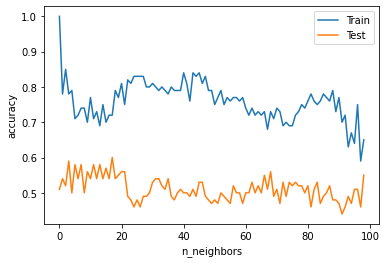

In [110]:
train_score = []
test_score = []
for _ in range(1,100):
    kn = KNeighborsClassifier(n_neighbors=_,
                          algorithm = 'brute',
                          metric='mahalanobis',
                          metric_params={'V': np.cov(X)})
    kn.fit(X,y)
    train_score.append(kn.score(X,y))
    test_score.append(kn.score(test_x,test_y))
    
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

## correlation_distance

In [113]:
from sklearn.model_selection import train_test_split
X , test_x , y, test_y = train_test_split(train_data,target_data, random_state = 10)

In [114]:
kn = KNeighborsClassifier(n_neighbors=5, weights = 'distance',metric='correlation')
kn.fit(X,y)
kn.score(X,y)

1.0

In [115]:
kn.score(test_x,test_y)

0.7100330760749725

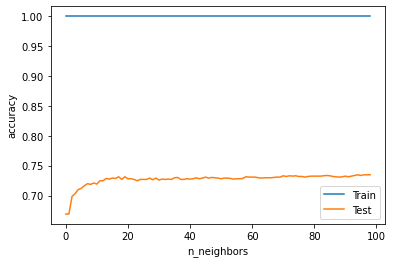

In [116]:
train_score = []
test_score = []
for _ in range(1,100):
    kn = KNeighborsClassifier(n_neighbors=_, weights = 'distance',metric='correlation')
    kn.fit(X,y)
    train_score.append(kn.score(X,y))
    test_score.append(kn.score(test_x,test_y))
    
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

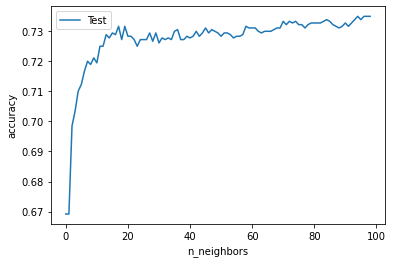

In [117]:
plt.plot(test_score)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(['Test'])
plt.show()

In [118]:
max(test_score)

0.7348401323042999